<p style="font-family: Arial; font-size:3.75em;color:black; font-style:bold"><br>
Logistic Regression (HW)
</p><br>
Question
<br>
Reference: https://github.com/leventbass/logistic_regression

조교
- 이정수 (KAIST AI 석사과정): bebeto@kaist.ac.kr
- 이상현 (KAIST AI 박사과정): shlee6825@kaist.ac.kr


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import seaborn as sns


## Logistic Regression를 클래스화 하기 

In [38]:
class LogisticRegression():
    def __init__(self, X, y, alpha=0.03, n_iter=1500):

        self.alpha = alpha
        self.n_iter = n_iter
        self.n_samples = len(y)
        self.n_features = np.size(X, 1)
        self.X = np.hstack((np.ones((self.n_samples, 1)), (X - np.mean(X, 0)) / np.std(X, 0)))
        # TODO-1: bias를 1로 채워진 벡터로 생성한 후 기존의 X와 column-wise로 합친 이후 normalize 진행
        self.y = y[:, np.newaxis] # TODO-2: y축의 axis를 1 늘리기 
        self.params = np.zeros((self.n_features + 1, 1))
        self.cost_history = []

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
        
    def compute_cost(self, X, y, theta):
        h = self.sigmoid(X @ theta)
        epsilon = 1e-5
        cost = (1/m)*(((-y).T @ np.log(h + epsilon))-((1-y.T @ np.log(1-h + epsilon)))) 
        # TODO-3: logistic regression의 cost function 선언
        return cost
        
    def fit(self):
        for i in range(self.n_iter):
            self.params = self.params - (learning_rate/m) * (self.X.T @ (self.sigmoid(self.X @ self.params) - self.y))
            # TODO-3: logistic regression의 gradient descent 진행
            self.cost_history.append(self.compute_cost(self.X, self.y, self.params)[0][0])
        return self
        
    def predict(self, X):
        X = np.hstack((np.ones((X.shape[0], 1)), (X - np.mean(X, 0)) / np.std(X, 0)))
        return np.round(self.sigmoid(X @ self.params))
        # TODO-3: logistic regression의 prediction을 0.5를 기준으로 반올림
        
    def get_params(self):
        return self.params

In [39]:
from sklearn.datasets import load_boston
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import pandas as pd

X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1, random_state=14)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

m = len(y)
n = np.size(X_train,1)
params = np.zeros((n,1))

iterations = 1500
learning_rate = 0.03

In [40]:
print('train/test shape 확인')
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

train/test shape 확인
(350, 2) (150, 2)
(350,) (150,)


In [41]:
regressor = LogisticRegression(X_train, y_train, alpha=learning_rate, n_iter=iterations).fit()

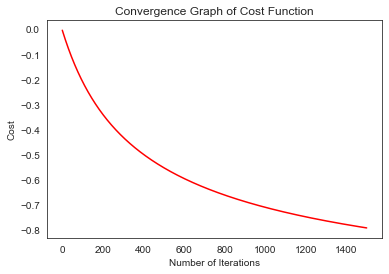

In [42]:
plt.figure()
sns.set_style('white')
plt.plot(range(len(regressor.cost_history)), regressor.cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [43]:
y_pred = regressor.predict(X_test).squeeze(1)
accuracy = float(sum(y_pred == y_test))/ float(len(y_test))
print(accuracy)

0.9733333333333334
